Loaded 70000 images of shape 28×28


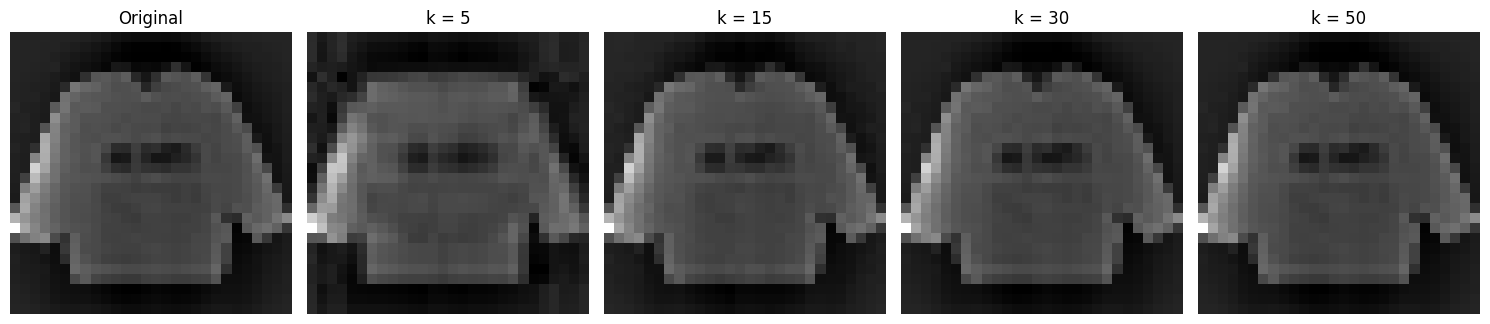

k	Compression Ratio	MSE
5	0.3635		0.0898
15	1.0906		0.0018
30	2.1811		0.0000
50	3.6352		0.0000


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd


# Load the dataset
X = np.load('/Users/limengfeiyang/CMOR438-final-project/data/processed/fashion_mnist1/X_fashion.npy')

# If flat, reshape to images
if X.ndim == 2:
    X = X.reshape(-1, 28, 28)

print(f"Loaded {X.shape[0]} images of shape {X.shape[1]}×{X.shape[2]}")


# Define compression function using SVD
def compress_svd(image, k):
    """
    Compress a grayscale image by keeping only the top-k singular values.
    
    :param image: 2D numpy array (m × n)
    :param k: number of singular values to retain
    :return: reconstructed image of same shape
    """
    U, S, VT = svd(image, full_matrices=False)
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    VT_k = VT[:k, :]
    return U_k @ S_k @ VT_k


# Pick an example image
idx = 0
image = X[idx]

# Compress and visualize for different k
k_values = [5, 15, 30, 50]
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 4))

# Show original
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

# Show approximations
for i, k in enumerate(k_values, start=1):
    approx = compress_svd(image, k)
    axes[i].imshow(approx, cmap='gray')
    axes[i].set_title(f'k = {k}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Quantify compression ratio and reconstruction error
m, n = image.shape
print("k\tCompression Ratio\tMSE")
for k in k_values:
    # ratio = (values stored) / (original pixels)
    ratio = (k * (m + n + 1)) / (m * n)
    approx = compress_svd(image, k)
    mse = np.mean((image - approx) ** 2)
    print(f"{k}\t{ratio:.4f}\t\t{mse:.4f}")
